In [243]:

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns 
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.api import qqplot

plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False


In [244]:
df = pd.read_csv("./SCALE불량.csv", encoding='euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


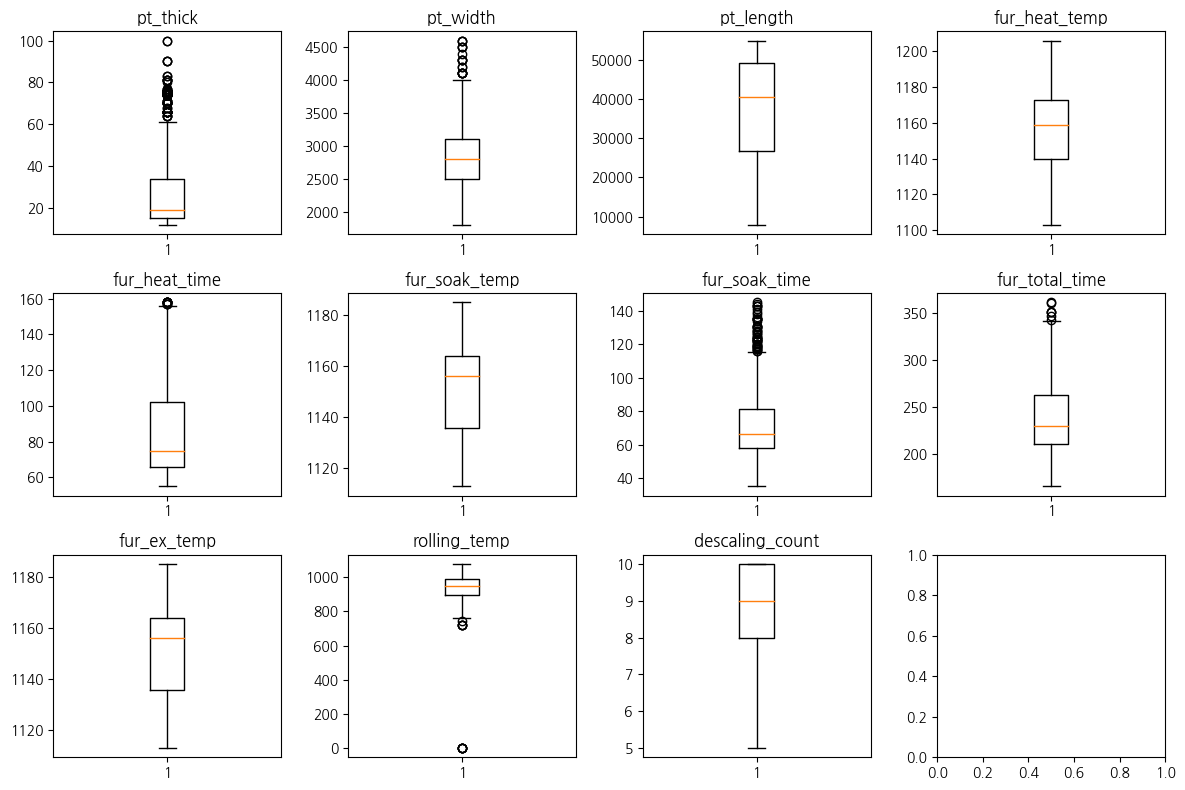

In [245]:
# 이상치 확인
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
             'fur_total_time', 'fur_ex_temp', 'rolling_temp', 'descaling_count']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # 3행 4열의 subplot 생성
axes = axes.flatten()  # 2차원 배열을 1차원으로 펼치기

for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable])
    axes[i].set_title(f"{variable}")

# subplot 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [246]:
# def return_avg(dataframe):
    
# df[df['spec_long'] == 'NV-D32-TM']['rolling_temp']

# df[df['spec_long'] == 'NV-D32-TM']['rolling_temp'].drop(df[df['spec_long'] == 'NV-D32-TM']['rolling_temp'] == 0)
# df[df['spec_long'] == 'NV-D32-TM']['rolling_temp'] == 0
# df[df['spec_long'] == 'NV-D32-TM']['rolling_temp']

# df[(df['spec_long'] == 'NV-D32-TM') & (df['rolling_temp'] != 0)]['rolling_temp'].mean()
filtered_df = df[(df['rolling_temp'] != 0)]
average_rolling_temp = filtered_df.groupby(['spec_long', 'scale'])['rolling_temp'].mean()
average_rolling_temp


spec_long    scale
A131-DH36TM  불량        859.000000
A283-C       불량       1020.600000
             양품        981.000000
A516-60      불량        955.000000
             양품        904.000000
                         ...     
PILAC-BT33   양품        885.694444
SA283-C      불량       1012.600000
             양품        984.909091
V42JBN3      불량        901.000000
             양품        910.000000
Name: rolling_temp, Length: 108, dtype: float64

In [247]:
average_rolling_temp.to_frame()
average_rolling_temp.index

MultiIndex([('A131-DH36TM', '불량'),
            (     'A283-C', '불량'),
            (     'A283-C', '양품'),
            (    'A516-60', '불량'),
            (    'A516-60', '양품'),
            (    'A709-36', '양품'),
            (       'AB/A', '불량'),
            (       'AB/A', '양품'),
            (    'AB/AH32', '불량'),
            (    'AB/AH32', '양품'),
            ...
            (  'NV-D36-TM', '불량'),
            (  'NV-D36-TM', '양품'),
            (  'NV-E32-TM', '양품'),
            (  'NV-E36-TM', '양품'),
            ( 'PILAC-BT33', '불량'),
            ( 'PILAC-BT33', '양품'),
            (    'SA283-C', '불량'),
            (    'SA283-C', '양품'),
            (    'V42JBN3', '불량'),
            (    'V42JBN3', '양품')],
           names=['spec_long', 'scale'], length=108)

In [248]:
zero_list = df.loc[df['rolling_temp'] == 0, "plate_no"].values
df.at[53, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('GL-E36-TM', '양품'))][0]
df.at[221, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('JS-SM490YB', '양품'))][0]
df.at[222, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('JS-SM490YB', '양품'))][0]

df.at[598, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('PILAC-BT33', '양품'))][0]

df.at[599, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('PILAC-BT33', '양품'))][0]

df.at[600, "rolling_temp"] = average_rolling_temp[(average_rolling_temp.index == ('NV-D32-TM', '양품'))][0]



In [249]:
df[df["plate_no"]=="PLT_1054"].values

array([['PLT_1054', '03JAN2023:16:22:29', '양품', 'GL-E36-TM', '독일', 'T',
        56, 3800, 11400, '적용', '3호기', '2열', 1132, 95, 1128, 80, 244,
        1128, 'TMCP(온도제어)', 842.1428571428571, 6, '1조']], dtype=object)

In [250]:

# df.loc[df['plate_no'] == zero_list]
# zero_list
# df.filter(lambda x: x['rolling_temp'].isin(zero_list))
k=0
new_df = pd.DataFrame(columns=df.columns)
for i in zero_list:
    # new_df.loc[k] = df[df["plate_no"]==i].values
    new_df.loc[k] = df[df["plate_no"]==i].values[0]
    k+=1
new_df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1054,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,...,1132,95,1128,80,244,1128,TMCP(온도제어),842.142857,6,1조
1,PLT_1222,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1163,57,1166,67,228,1166,CR(제어압연),959.574468,10,2조
2,PLT_1223,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1169,64,1164,61,188,1164,CR(제어압연),959.574468,10,2조
3,PLT_1599,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,...,1133,89,1122,59,229,1122,CR(제어압연),885.694444,6,3조
4,PLT_1600,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,...,1130,92,1124,61,210,1124,CR(제어압연),885.694444,6,3조
5,PLT_1601,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,...,1119,109,1117,76,260,1117,TMCP(온도제어),891.0,6,3조


In [251]:
display(df[df['rolling_temp'] == 0.000000])
print(df['rolling_temp'].describe())
print(df[df['spec_long'] == 'NV-D32-TM']['rolling_temp'].mean())
print(df[df['spec_long'] == 'GL-E36-TM']['rolling_temp'].mean())
print(df[df['spec_long'] == 'PILAC-BT33']['rolling_temp'].mean())
print(df[df['spec_long'] == 'JS-SM490YB']['rolling_temp'].mean())

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group


count    1000.000000
mean      940.060681
std        63.810004
min       723.000000
25%       894.000000
50%       948.000000
75%       991.000000
max      1078.000000
Name: rolling_temp, dtype: float64
891.0
842.4464285714286
885.6097222222222
978.4660587639311


In [252]:
# df.isnull().sum()
# 이상치 값을 평균 값으로 채우기
filtered_data = df[(df['spec_long'] == 'A131-DH36TM') & (df['scale'] == '불량')]


# df.loc[df['plate_no'] == 'PLT_1054', 'rolling_temp'] = df[df['plate_no'] == 'PLT_1054']['rolling_temp'].replace(0, average_rolling_temp[(average_rolling_temp["spec_long"] == "PLT_1054"]) & )
# df.loc[df['plate_no'].isin(['PLT_1222', 'PLT_1223']), 'rolling_temp'] = df[df['plate_no'].isin(['PLT_1222', 'PLT_1223'])]['rolling_temp'].replace(0, 955.6190476190476)
# df.loc[df['plate_no'].isin(['PLT_1599', 'PLT_1600']), 'rolling_temp'] = df[df['plate_no'].isin(['PLT_1599', 'PLT_1600'])]['rolling_temp'].replace(0, 841.325)
# df.loc[df['plate_no'] == 'PLT_1601', 'rolling_temp'] = df[df['plate_no'] == 'PLT_1601']['rolling_temp'].replace(0, 668.25)


In [253]:
df[df['rolling_temp'] == 0.000000]

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group


In [254]:
df[df['scale'] == '불량'].describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.00000
mean,24.129032,2692.258065,37869.354839,1164.293548,84.564516,1159.406452,64.974194,231.316129,1159.406452,988.754839,8.46129
std,13.438682,496.985799,9857.807654,19.421261,23.808582,13.380030,15.700452,31.043399,13.380030,51.881224,1.34986
min,12.000000,1800.000000,9200.000000,1115.000000,55.000000,1119.000000,35.000000,172.000000,1119.000000,760.000000,5.00000
25%,17.250000,2300.000000,32125.000000,1154.000000,67.000000,1154.000000,55.000000,210.000000,1154.000000,964.000000,8.00000
50%,20.000000,2500.000000,38950.000000,1165.000000,76.000000,1162.000000,62.000000,225.500000,1162.000000,1005.000000,8.00000
75%,25.000000,3100.000000,43275.000000,1174.750000,96.000000,1167.000000,72.000000,246.000000,1167.000000,1022.000000,10.00000
max,100.000000,4500.000000,54800.000000,1206.000000,158.000000,1185.000000,145.000000,342.000000,1185.000000,1078.000000,10.00000


In [255]:
df[df['scale'] == '양품'].describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,27.973913,2894.637681,36302.463768,1154.078261,86.604348,1147.118841,74.750725,241.856522,1147.118841,918.183595,8.600000
std,19.783866,480.067363,15371.939537,21.280754,27.403002,17.578860,21.798960,40.602158,17.578860,56.128549,1.705281
min,12.000000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,40.000000,165.000000,1113.000000,723.000000,6.000000
25%,14.000000,2500.000000,21300.000000,1137.000000,65.000000,1129.000000,58.000000,210.000000,1129.000000,877.000000,6.000000
50%,18.000000,2900.000000,41600.000000,1156.000000,74.000000,1149.000000,69.000000,234.000000,1149.000000,929.000000,10.000000
75%,40.000000,3200.000000,50700.000000,1171.000000,106.000000,1163.000000,86.000000,269.000000,1163.000000,961.000000,10.000000
max,90.000000,4600.000000,54900.000000,1200.000000,158.000000,1175.000000,144.000000,362.000000,1175.000000,1000.000000,10.000000


In [256]:
# df.head()
from datetime import datetime
converted_data = []
for date_str in df["rolling_date"]:
    converted_date = datetime.strptime(date_str, "%d%b%Y:%H:%M:%S")
    converted_data.append(converted_date)
df['rolling_date'] = converted_data
df['rolling_date'] 

0     2023-01-03 07:07:53
1     2023-01-03 07:21:22
2     2023-01-03 07:31:15
3     2023-01-03 07:41:01
4     2023-01-03 07:52:40
              ...        
995   2023-01-10 05:32:25
996   2023-01-10 05:39:19
997   2023-01-10 05:52:41
998   2023-01-10 06:01:50
999   2023-01-10 06:16:27
Name: rolling_date, Length: 1000, dtype: datetime64[ns]

In [257]:
df.drop('spec_long', axis=1, inplace=True)
df.drop('fur_ex_temp', axis=1, inplace=True)
df.drop('plate_no', axis=1, inplace=True)
df.drop('rolling_date', axis=1, inplace=True)

df["bf_temp"] = df["fur_soak_temp"] - df["rolling_temp"]

In [258]:
df.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,양품,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,양품,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,양품,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,양품,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,양품,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


In [259]:
df.to_csv('SCALE_preprossed.csv', index=False)  # index=False로 설정하여 인덱스를 저장하지 않음

print("CSV 파일이 저장되었습니다.")

CSV 파일이 저장되었습니다.
